**1.Import the important libriary**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)
from sklearn.ensemble import IsolationForest

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML
import vizpro

**2. Read the dataset**

In [5]:
df= pd.read_csv("C:\\Users\\Santosh Kumar_TSI\\AWS SageMaker flight price prediction\\train.csv")

In [6]:
df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-06,Banglore,Delhi,08:00:00,08:15:00,1455,1,no info,17996
1,Spicejet,2019-06-06,Kolkata,Banglore,22:20:00,00:40:00,140,0,no info,3873
2,Indigo,2019-03-18,Kolkata,Banglore,05:30:00,08:20:00,170,0,no info,4462
3,Jet Airways,2019-03-24,Mumbai,Hyderabad,15:50:00,17:20:00,90,0,in-flight meal not included,2228
4,Spicejet,2019-04-27,Banglore,Delhi,09:30:00,12:20:00,170,0,no info,4991


In [7]:
df.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
additional_info    object
price               int64
dtype: object

In [8]:
for j in ["date_of_journey", "dep_time", "arrival_time"]:
    df[j]=pd.to_datetime(df[j],dayfirst=True,format="mixed")




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          7323 non-null   object        
 1   date_of_journey  7323 non-null   datetime64[ns]
 2   source           7323 non-null   object        
 3   destination      7323 non-null   object        
 4   dep_time         7323 non-null   datetime64[ns]
 5   arrival_time     7323 non-null   datetime64[ns]
 6   duration         7323 non-null   int64         
 7   total_stops      7323 non-null   int64         
 8   additional_info  7323 non-null   object        
 9   price            7323 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 572.2+ KB


In [10]:
df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-06,Banglore,Delhi,2024-09-04 08:00:00,2024-09-04 08:15:00,1455,1,no info,17996
1,Spicejet,2019-06-06,Kolkata,Banglore,2024-09-04 22:20:00,2024-09-04 00:40:00,140,0,no info,3873
2,Indigo,2019-03-18,Kolkata,Banglore,2024-09-04 05:30:00,2024-09-04 08:20:00,170,0,no info,4462
3,Jet Airways,2019-03-24,Mumbai,Hyderabad,2024-09-04 15:50:00,2024-09-04 17:20:00,90,0,in-flight meal not included,2228
4,Spicejet,2019-04-27,Banglore,Delhi,2024-09-04 09:30:00,2024-09-04 12:20:00,170,0,no info,4991


In [11]:
df.describe(include="number")

,duration,total_stops,price
count,7323.000000,7323.000000,7323.000000
mean,628.415267,0.798580,9043.245255
std,502.312698,0.664377,4656.725717
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,500.000000,1.000000,8295.000000
75%,910.000000,1.000000,12373.000000
max,2860.000000,4.000000,79512.000000


In [12]:
(
 df.assign(total_stops= df.total_stops.astype("object"))
    .describe(include="O")

)

,airline,source,destination,total_stops,additional_info
count,7323,7323,7323,7323,7323
unique,9,5,5,5,8
top,Jet Airways,Delhi,Cochin,1,no info
freq,2615,3013,3013,3901,5694


**check for duplicate rows**


In [14]:
df[df.duplicated()]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
1535,Air Asia,2019-03-24,Banglore,Delhi,2024-09-04 23:25:00,2024-09-04 02:10:00,165,0,no info,4482


In [15]:
df=df.drop_duplicates()

In [16]:
df[df.duplicated()]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price


**Highlevel analysis of missing value**

In [18]:
flight= pd.read_csv("C:\\Users\\Santosh Kumar_TSI\\AWS SageMaker flight price prediction\\flight_price.csv")

In [19]:
vizpro.missing_info(df)

,column,count,percentage


In [20]:
vizpro.missing_info(flight)

,column,count,percentage
0,Route,1,0.009361
1,Total_Stops,1,0.009361


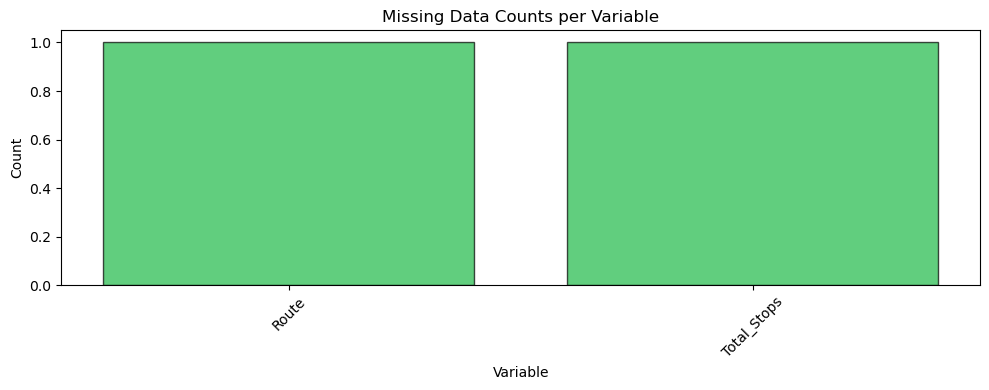

In [21]:
vizpro.plot_missing_info(flight)

## **High-level analysis of outliers**

In [23]:
vizpro.outlier_detect(df)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,ouliers
0,Jet Airways,2019-03-06,Banglore,Delhi,2024-09-04 08:00:00,2024-09-04 08:15:00,1455,1,no info,17996,-1
3,Jet Airways,2019-03-24,Mumbai,Hyderabad,2024-09-04 15:50:00,2024-09-04 17:20:00,90,0,in-flight meal not included,2228,-1
11,Jet Airways,2019-05-18,Kolkata,Banglore,2024-09-04 05:45:00,2024-09-04 08:15:00,1590,1,no info,13941,-1
12,Jet Airways,2019-05-21,Delhi,Cochin,2024-09-04 17:30:00,2024-09-04 19:00:00,1530,1,in-flight meal not included,12898,-1
14,Air India,2019-05-27,Mumbai,Hyderabad,2024-09-04 13:55:00,2024-09-04 15:25:00,90,0,no info,3625,-1
...,...,...,...,...,...,...,...,...,...,...,...
7310,Jet Airways,2019-05-21,Delhi,Cochin,2024-09-04 09:50:00,2024-09-04 13:05:00,195,0,no info,9564,-1
7312,Jet Airways,2019-06-06,Kolkata,Banglore,2024-09-04 08:25:00,2024-09-04 04:40:00,1215,1,in-flight meal not included,8586,-1
7315,Vistara,2019-05-09,Kolkata,Banglore,2024-09-04 17:00:00,2024-09-04 10:45:00,1065,1,no info,8452,-1
7316,Jet Airways,2019-05-24,Kolkata,Banglore,2024-09-04 09:35:00,2024-09-04 09:45:00,1450,1,no info,13067,-1


In [24]:
vizpro.get_iqr_outliers(df,"duration")

Lower Limit : -940.0
Upper Limit : 2020.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
105,Air India,2019-03-18,Banglore,Delhi,2024-09-04 06:45:00,2024-09-04 16:30:00,2025,2,no info,10835
2112,Jet Airways,2019-03-21,Delhi,Cochin,2024-09-04 18:25:00,2024-09-04 04:25:00,2040,2,no info,12347
7079,Jet Airways,2019-03-21,Delhi,Cochin,2024-09-04 18:20:00,2024-09-04 04:25:00,2045,2,no info,13082
7267,Jet Airways,2019-03-03,Delhi,Cochin,2024-09-04 18:20:00,2024-09-04 04:25:00,2045,2,no info,20747
5582,Air India,2019-05-01,Kolkata,Banglore,2024-09-04 05:50:00,2024-09-04 16:15:00,2065,2,no info,10991
4236,Jet Airways,2019-03-06,Delhi,Cochin,2024-09-04 17:55:00,2024-09-04 04:25:00,2070,2,no info,17072
2822,Jet Airways,2019-03-06,Delhi,Cochin,2024-09-04 17:55:00,2024-09-04 04:25:00,2070,2,in-flight meal not included,15812
5922,Air India,2019-03-03,Banglore,Delhi,2024-09-04 11:05:00,2024-09-04 22:10:00,2105,2,no info,11791
2887,Air India,2019-03-24,Kolkata,Banglore,2024-09-04 12:00:00,2024-09-04 23:15:00,2115,3,no info,14221
6793,Air India,2019-03-09,Delhi,Cochin,2024-09-04 07:05:00,2024-09-04 19:15:00,2170,2,no info,11762


**Pair plot**

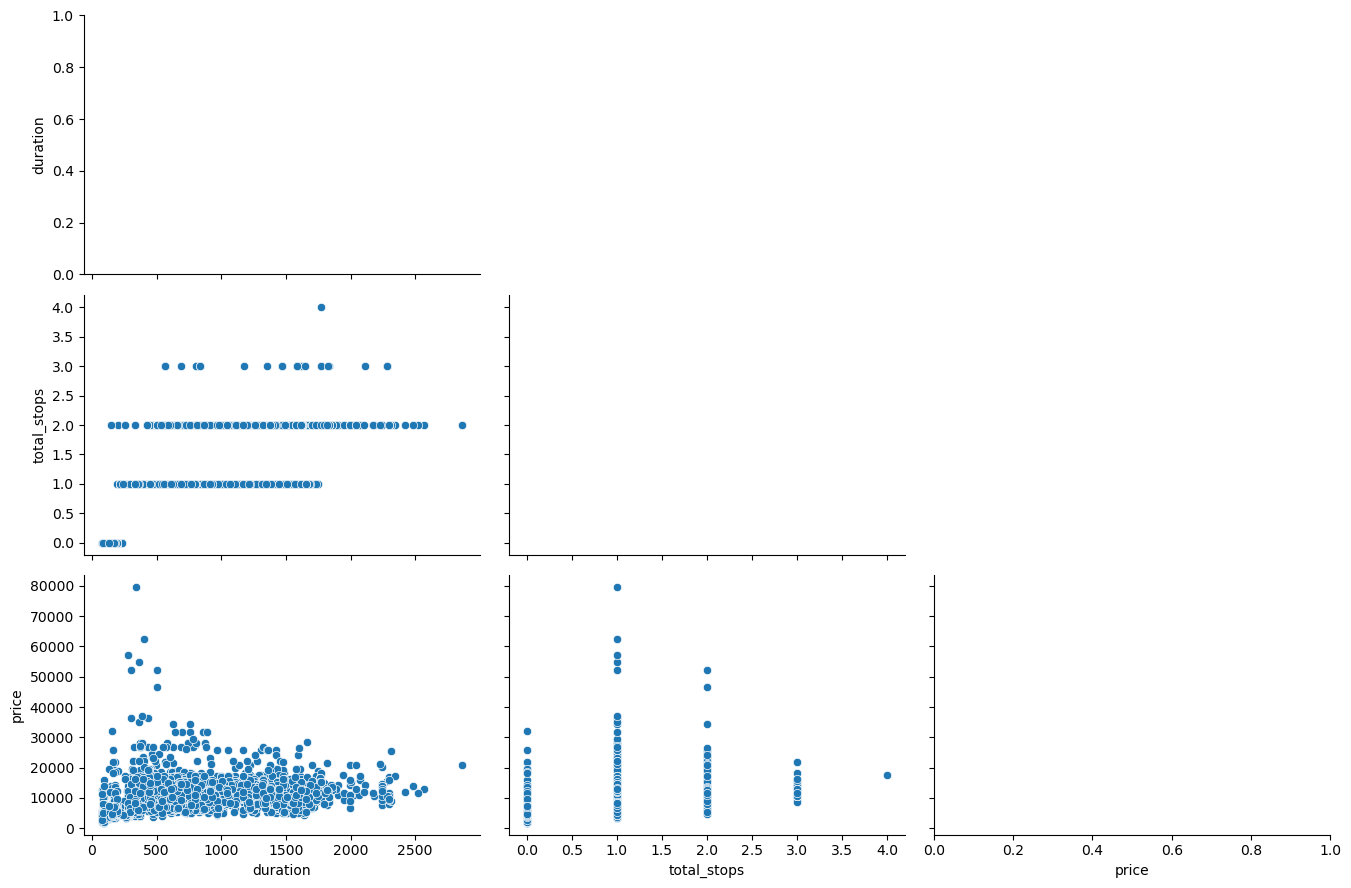

In [26]:
vizpro.pair_plots(df)

**Corelation Analysis**

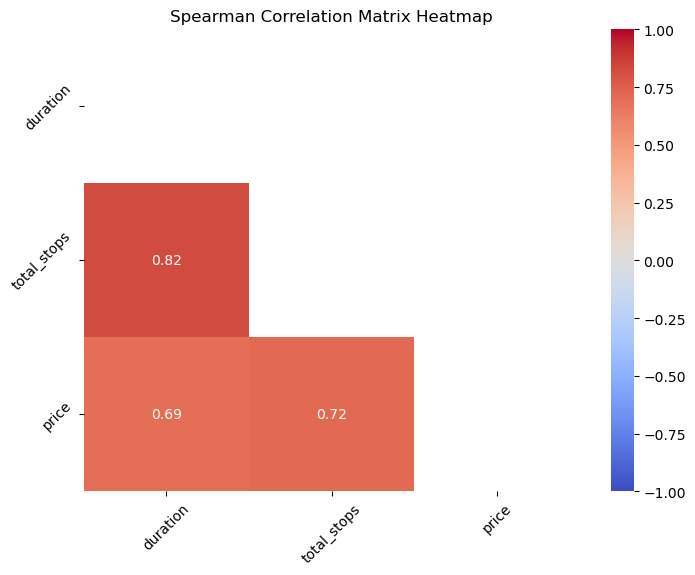

In [28]:
vizpro.corr_heatmap(df)

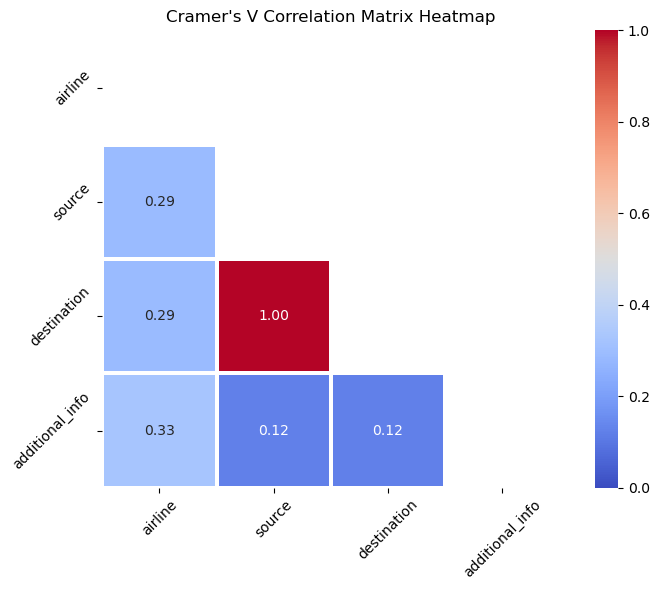

In [29]:
##Corelation analysis of categorical variable

vizpro.cramers_heatmap(df)

**Detailed Analysis**

## **airline**

In [32]:
vizpro.cat_summary(df,"airline")

0       Jet Airways
1          Spicejet
2            Indigo
3       Jet Airways
4          Spicejet
           ...     
7318    Jet Airways
7319         Indigo
7320    Jet Airways
7321      Air India
7322         Indigo
Name: airline, Length: 7322, dtype: object


Datatype:       object
Cardinality:    9
Missing data:   0 rows (0.00%)
Available data: 7322 / 7322


,
count,7322
unique,9
top,Jet Airways
freq,2615


,count,percentage
category,,
Jet Airways,2615,35.714286
Indigo,1413,19.298006
Air India,1166,15.924611
Multiple Carriers,856,11.690795
Spicejet,561,7.661841
Vistara,349,4.766457
Air Asia,218,2.977329
Goair,143,1.953018
Trujet,1,0.013657


**Univariate analysis of `airline`**

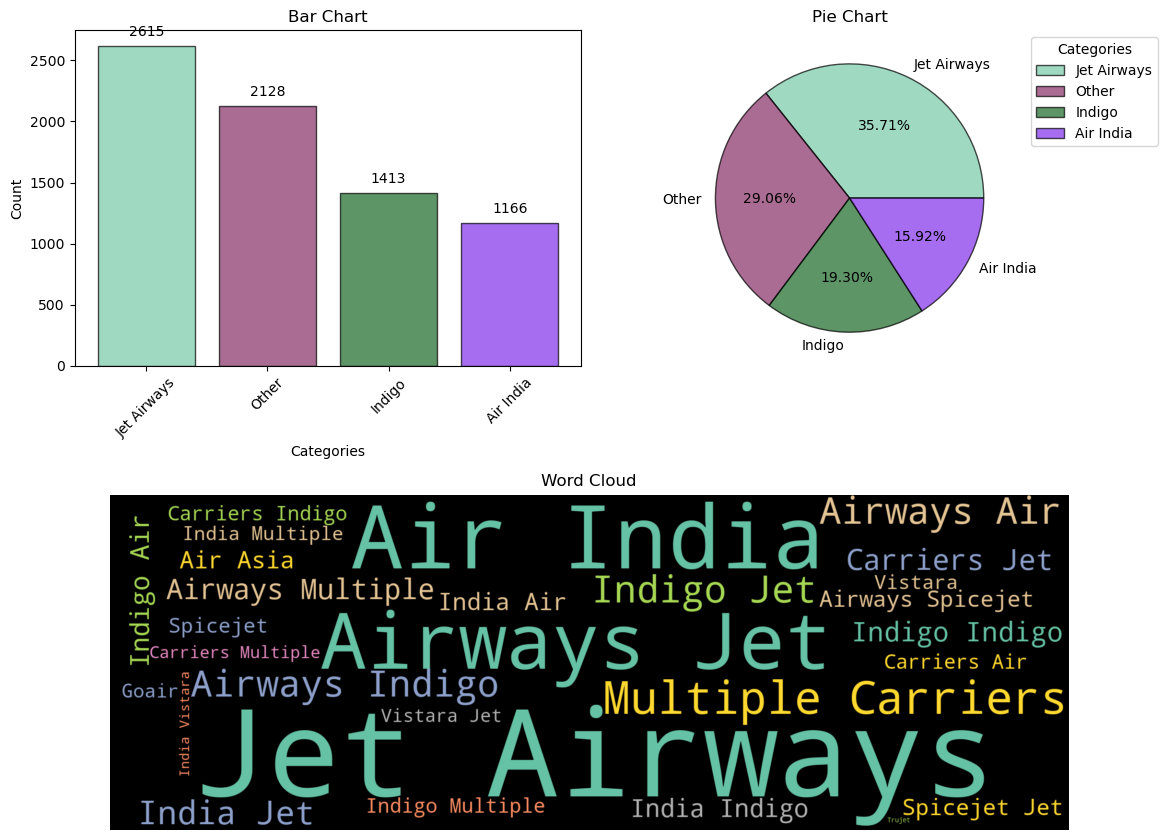

In [34]:


vizpro.cat_univar_plots(df, "airline", k=4)


**Bi-variate Analysis between airline and price**

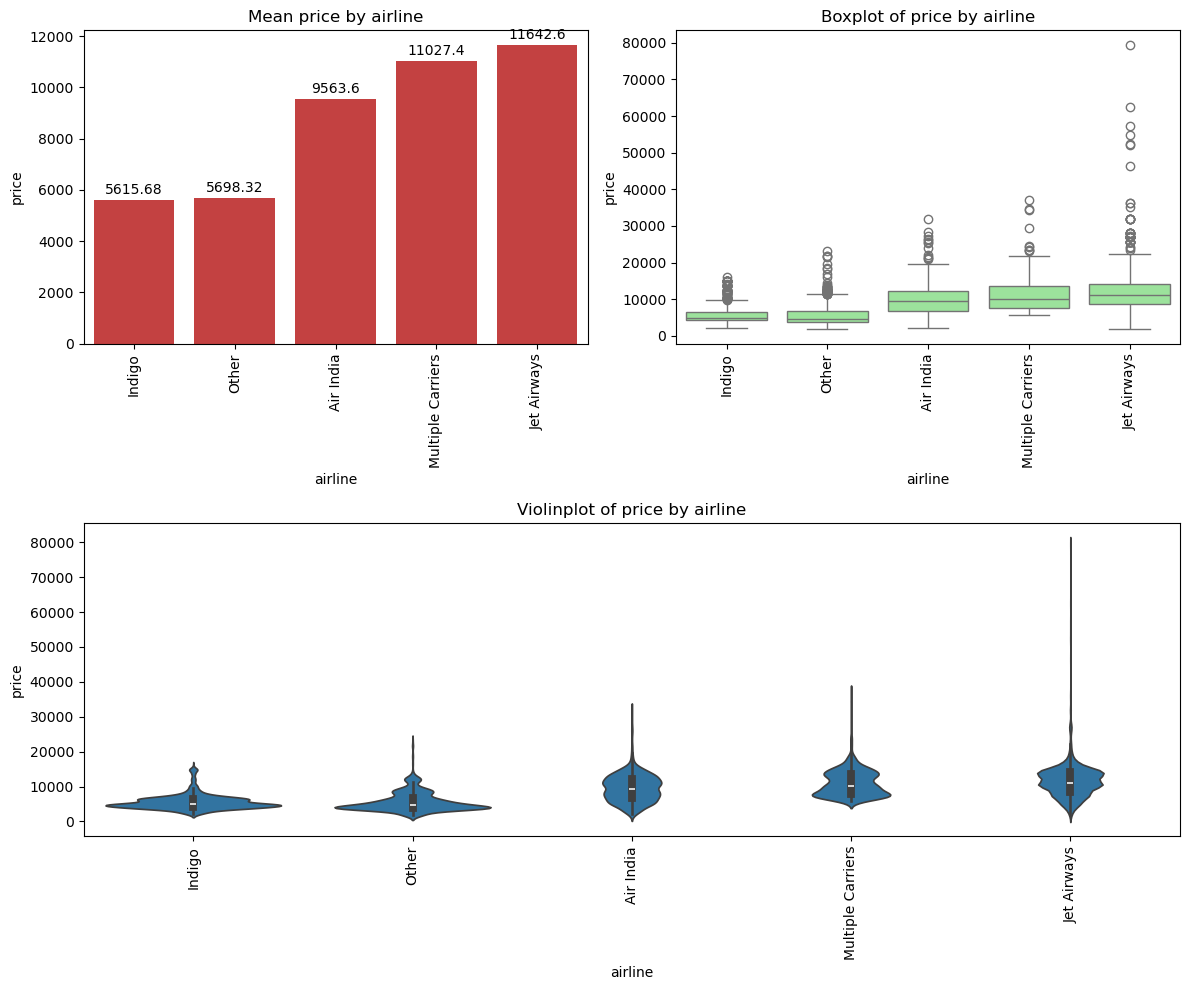

In [36]:
vizpro.num_cat_bivar_plots(df, "airline", "price", k=5, estimator="mean")


**Multivariate Analysis between airline, price, destination & total_stops:**

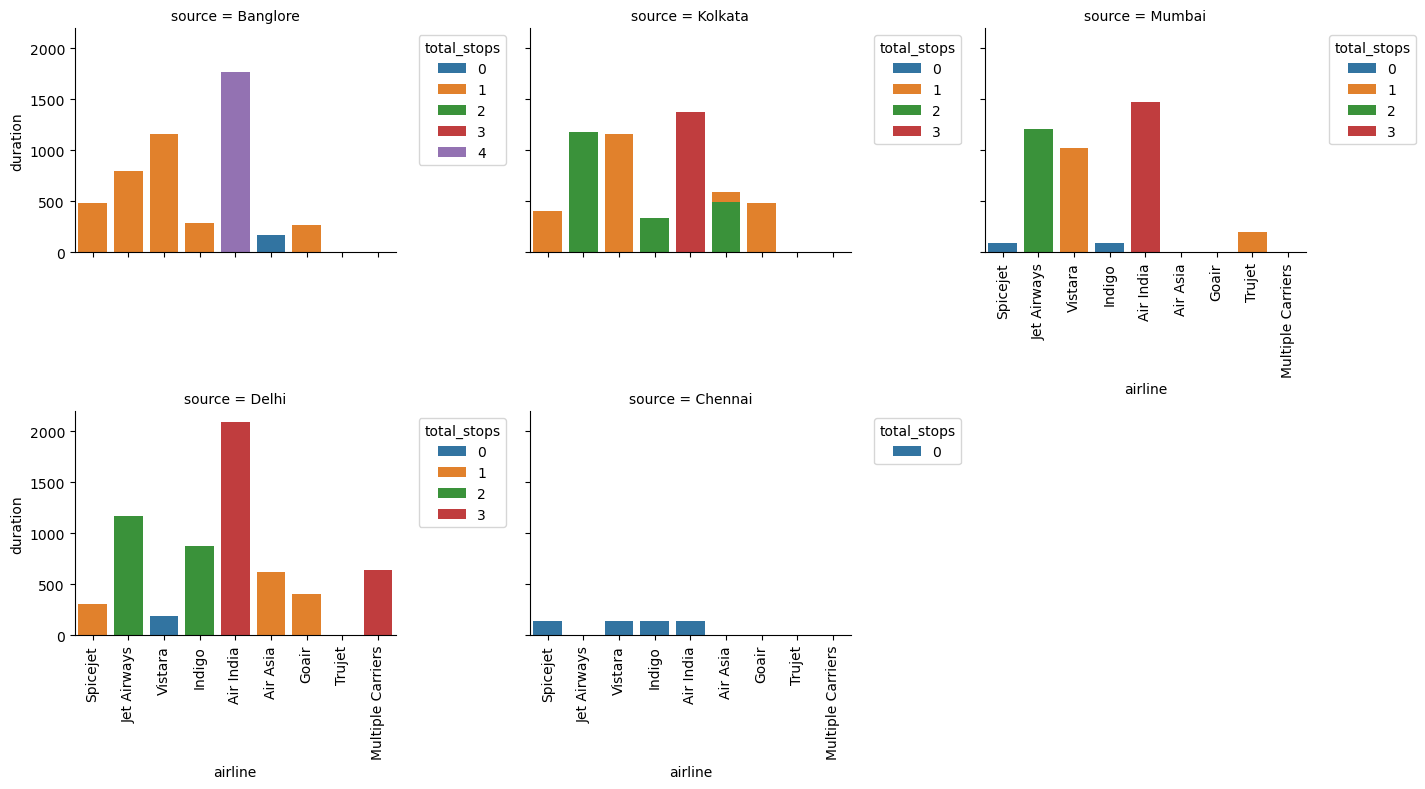

In [38]:
vizpro.cat_num_facetgrid(df, "source", "total_stops", "airline", "duration")

**Hypothesis Test**

In [40]:
vizpro.num_cat_hyp_testing(df,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 485.62936621811525
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3334.177890346246
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


## **date_of_journey**

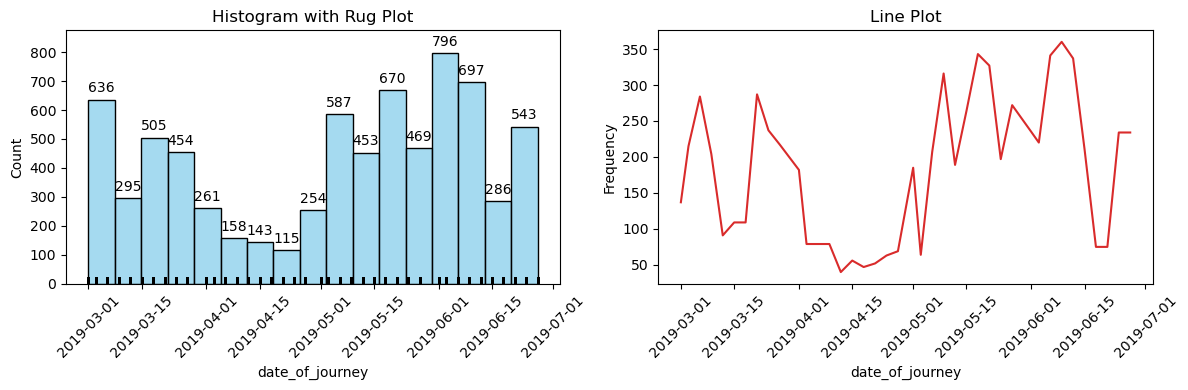

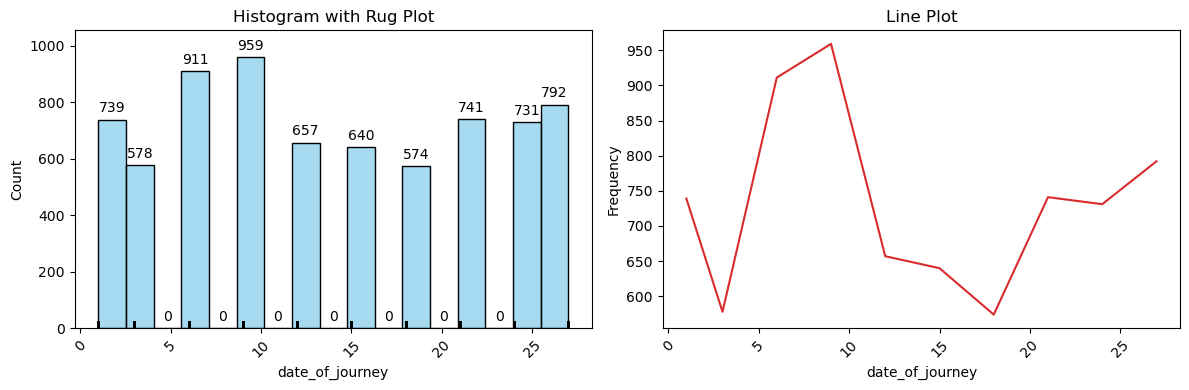

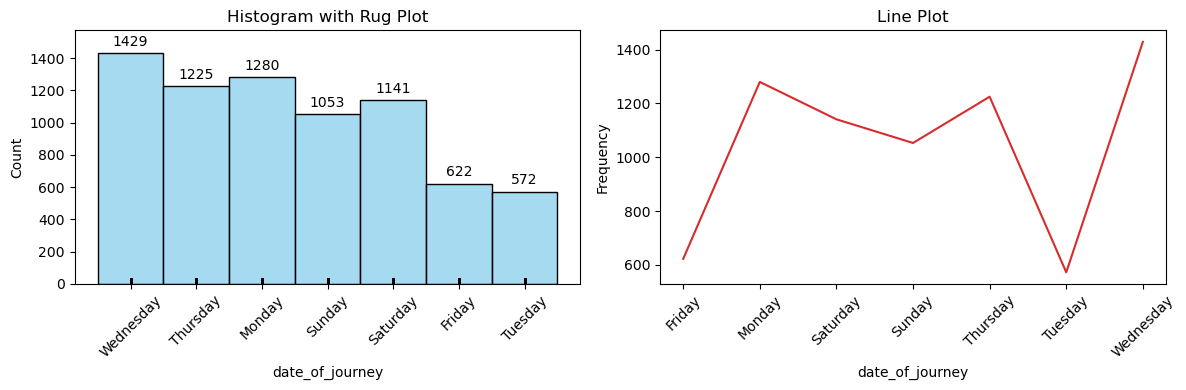

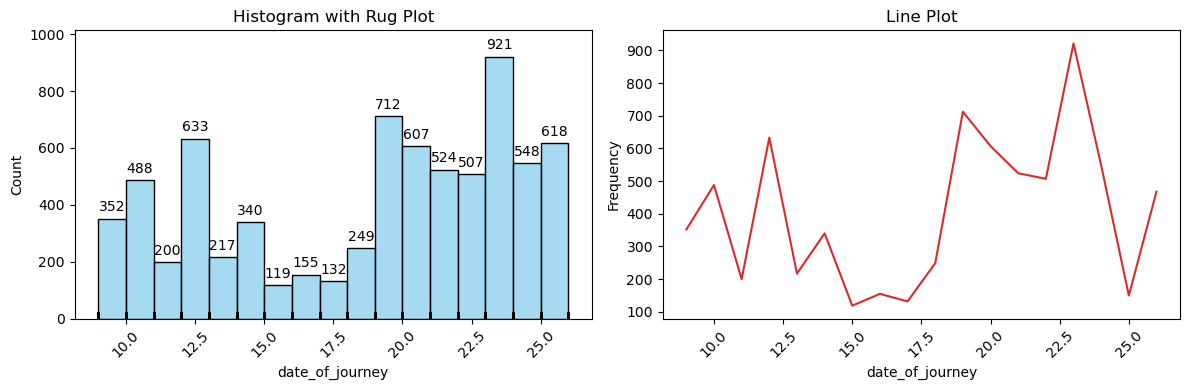

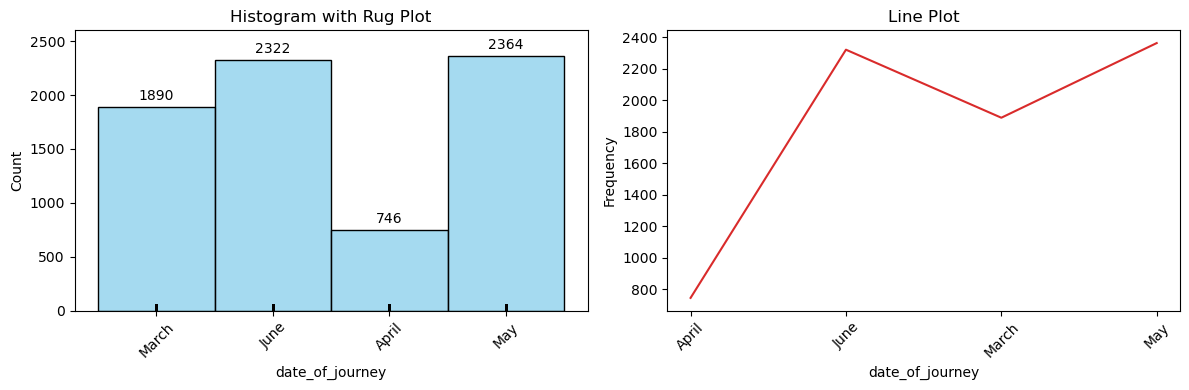

In [42]:
plots=[None,"dt.day","dt.day_name()","dt.isocalendar().week","dt.month_name()"]
for plot in plots: # Changed iteration variable to plot
    vizpro.dt_univariate_plot(df,"date_of_journey",parm=plot)


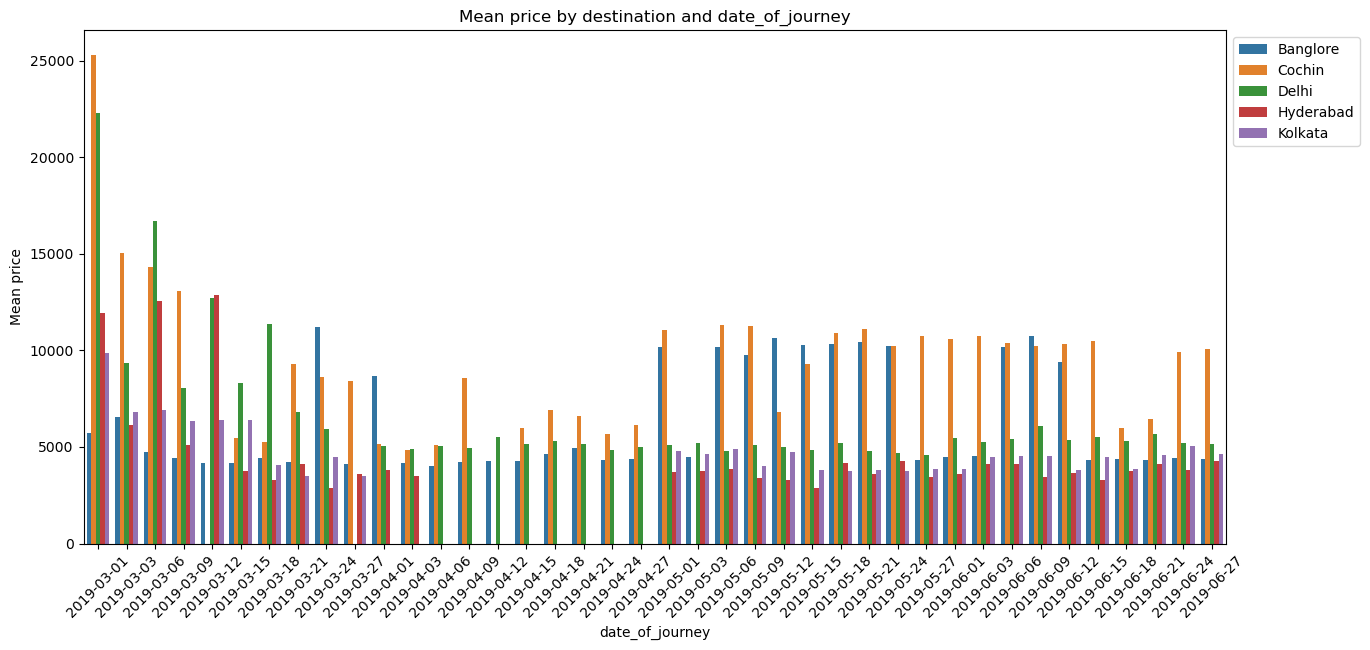

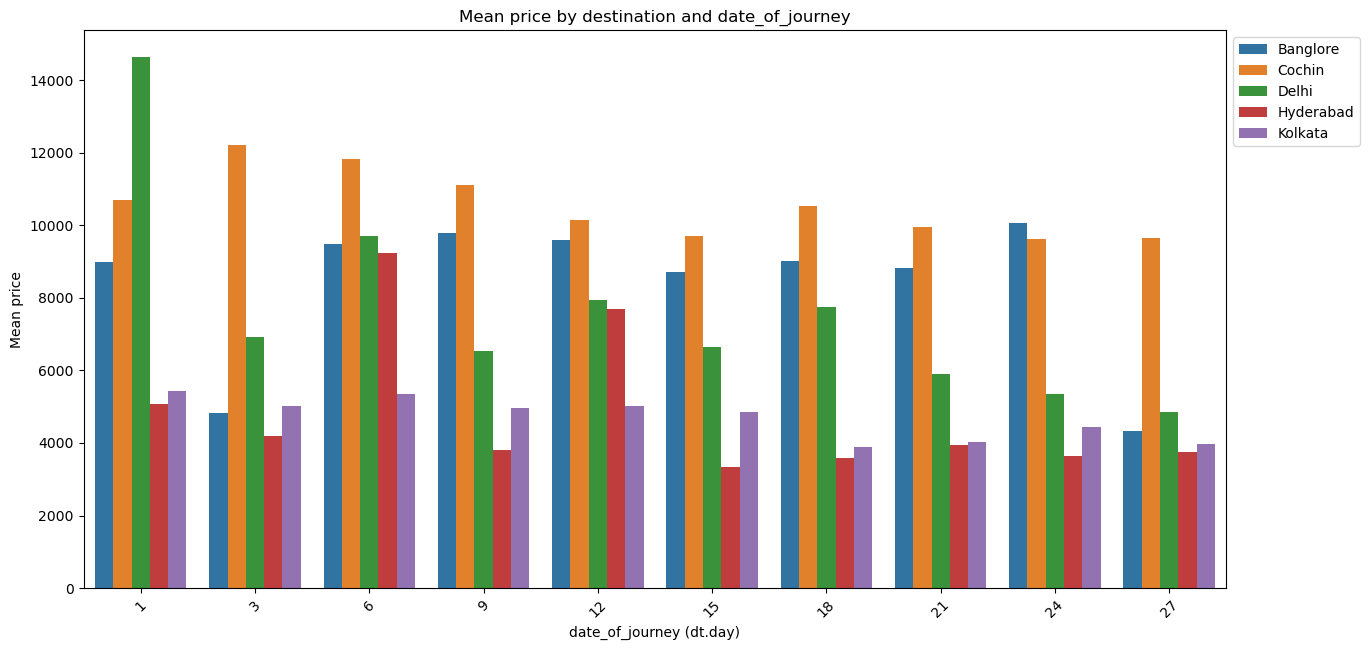

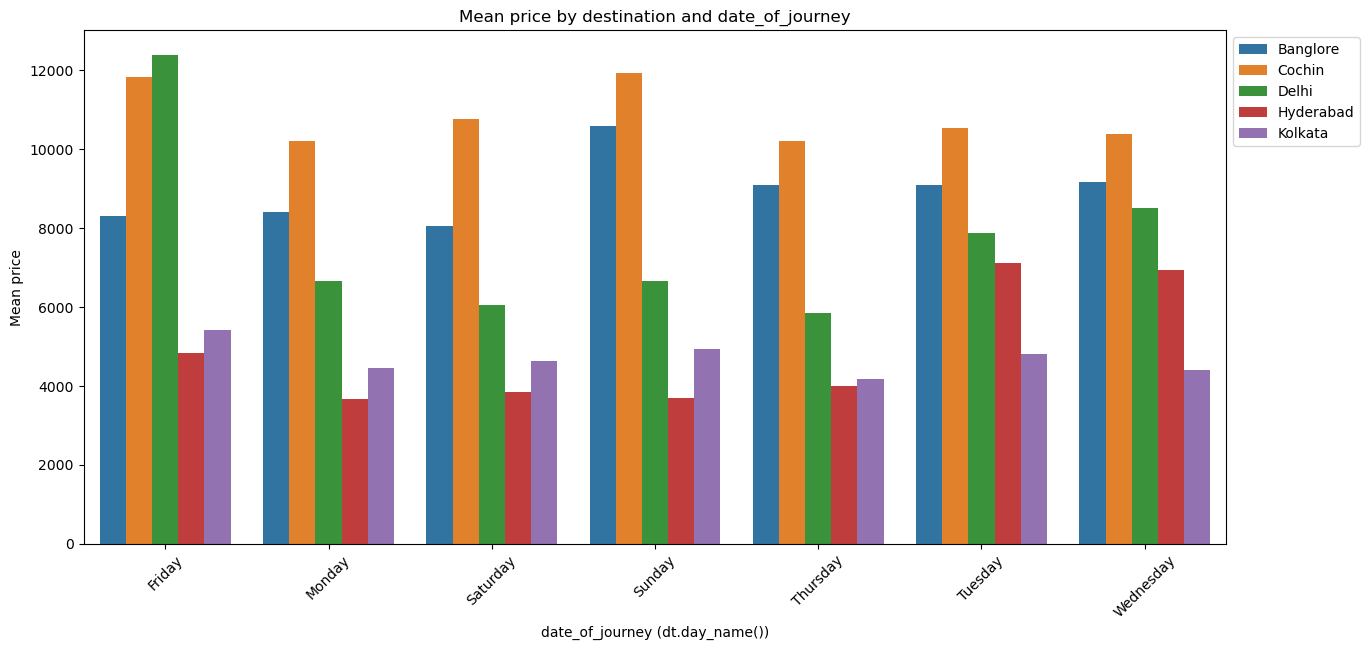

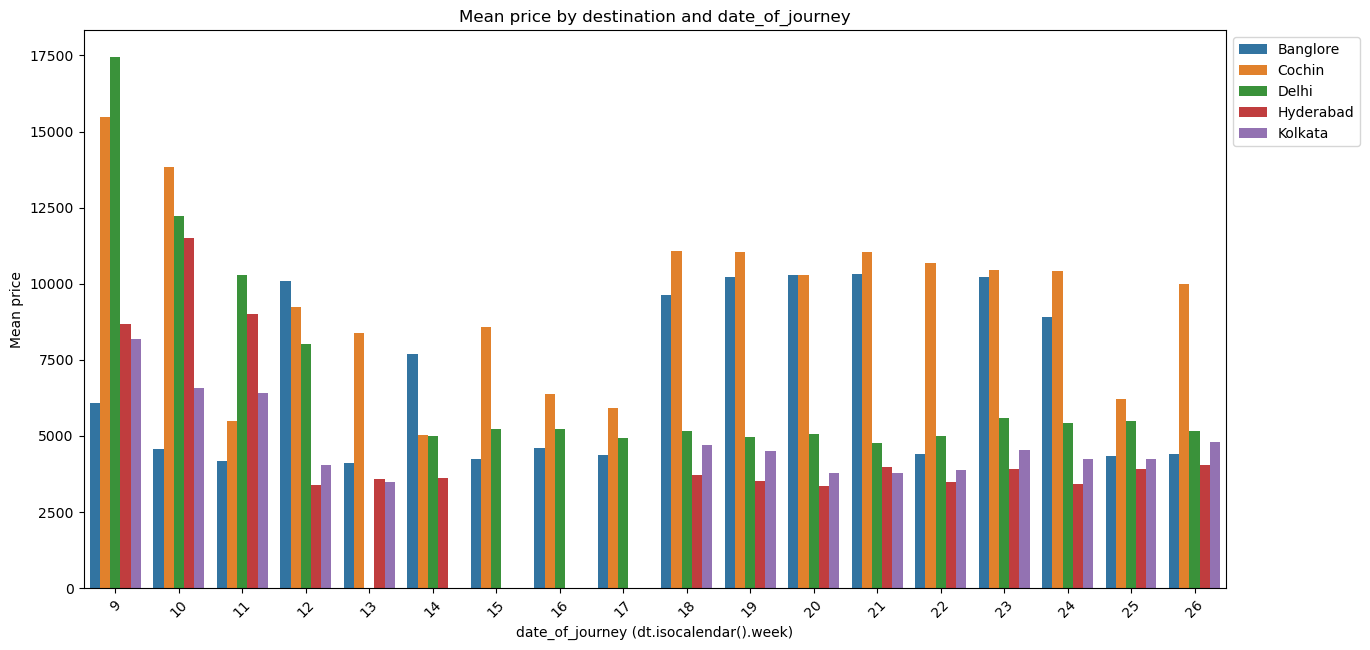

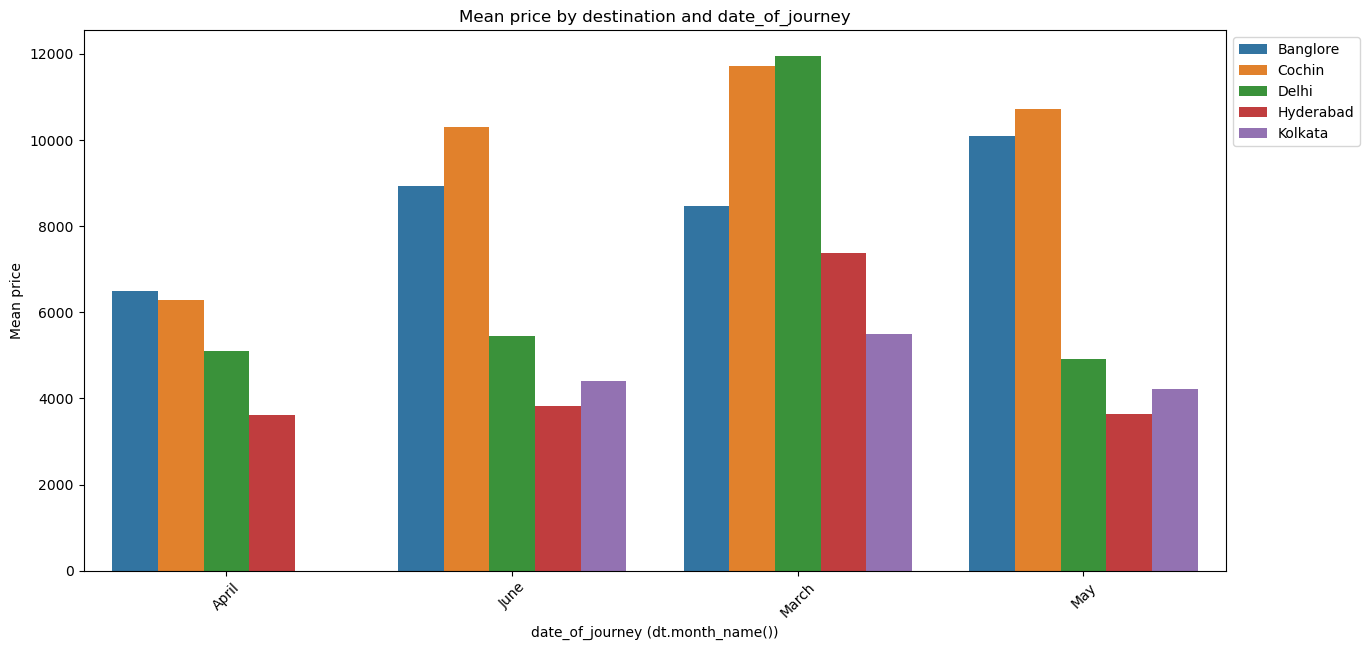

In [43]:
plots=[None,"dt.day","dt.day_name()","dt.isocalendar().week","dt.month_name()"]
for plot in plots: # Changed iteration variable to plot
    vizpro.dt_multivariate_plot(df, "date_of_journey", "destination", "price", parm=plot)



##**dep_time**

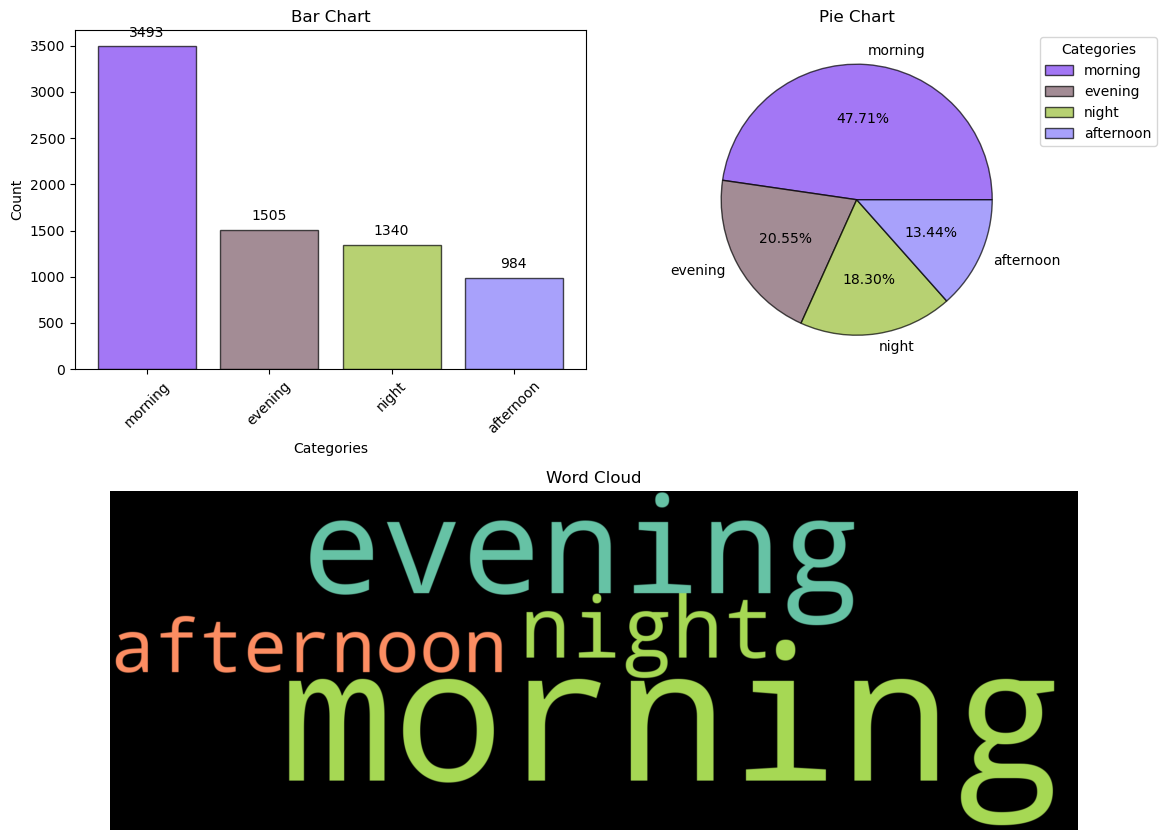

In [45]:
vizpro.cat_univar_plots(vizpro.assign_time_of_day(df,"dep_time"),"time_of_day")

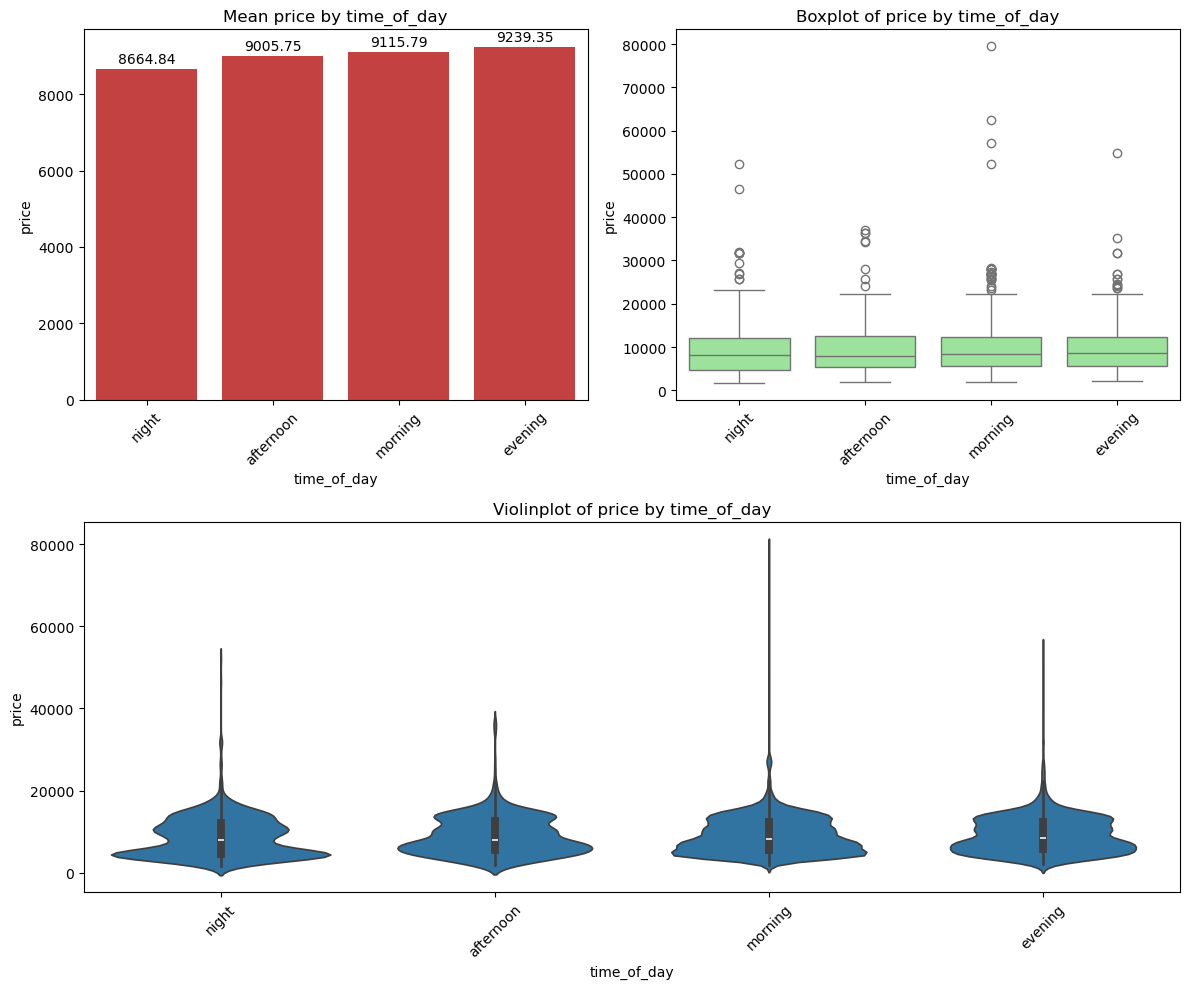

In [46]:
vizpro.num_cat_bivar_plots(vizpro.assign_time_of_day(df,"dep_time"), "time_of_day","price",rotation=45)


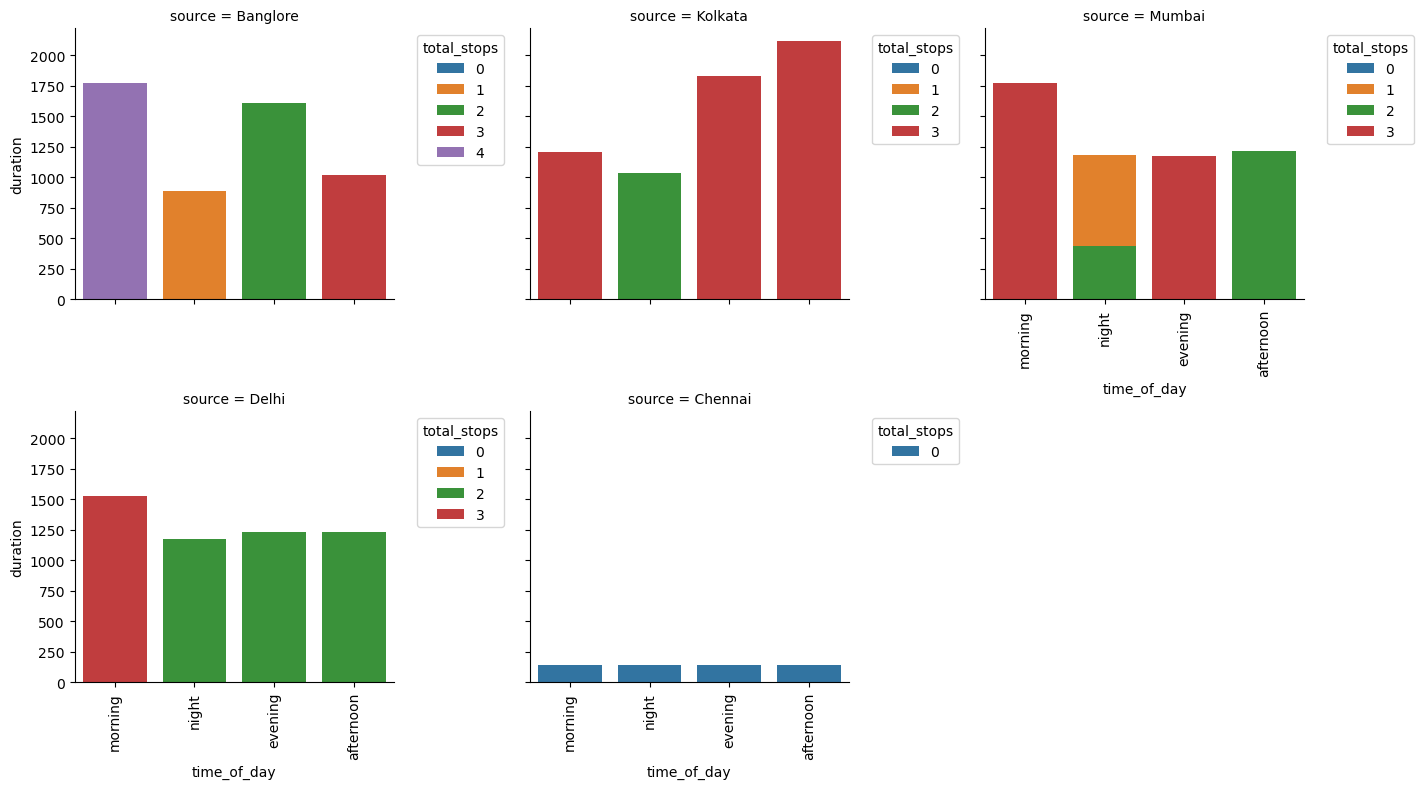

In [47]:

vizpro.cat_num_facetgrid(vizpro.assign_time_of_day(df,"dep_time"), "source", "total_stops", "time_of_day", "duration")

##**duration**

In [49]:
vizpro.Num_summary(df,"duration")

0       1455
1        140
2        170
3         90
4        170
        ... 
7318     610
7319     155
7320     175
7321     170
7322     135
Name: duration, Length: 7322, dtype: int64


Datatype:       int64
Missing data:   0 rows (0.00%)
Available data: 7322 / 7322


,value
percentile,
0.0,75.0
5.0,90.0
10.0,145.0
25.0,170.0
50.0,500.0
75.0,910.0
90.0,1450.0
95.0,1600.0
99.0,1840.0


,value
mean,628.478558
trimmed mean (5%),594.421851
trimmed mean (10%),564.663708
median,500.000000


,value
var,252323.173219
std,502.317801
IQR,740.000000
mad,330.000000
coef_variance,0.799260


,value
skewness,0.913865
kurtosis,-0.044275


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.363366486289025e-50
Test Statistic       : 0.8836853555983825
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 284.66761131788735
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


##**univariate analysis**

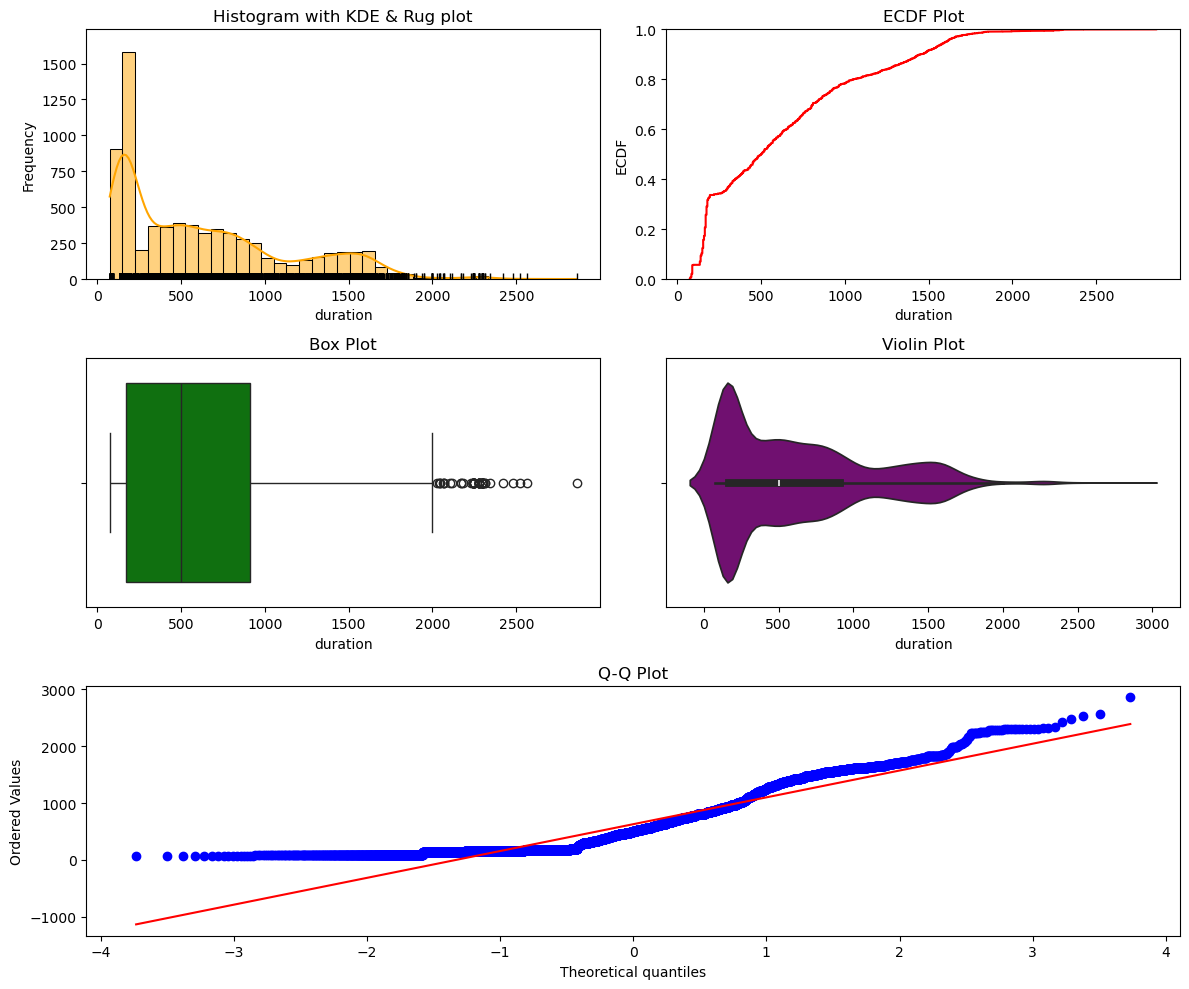

In [51]:
vizpro.num_univar_plots(df,"duration")

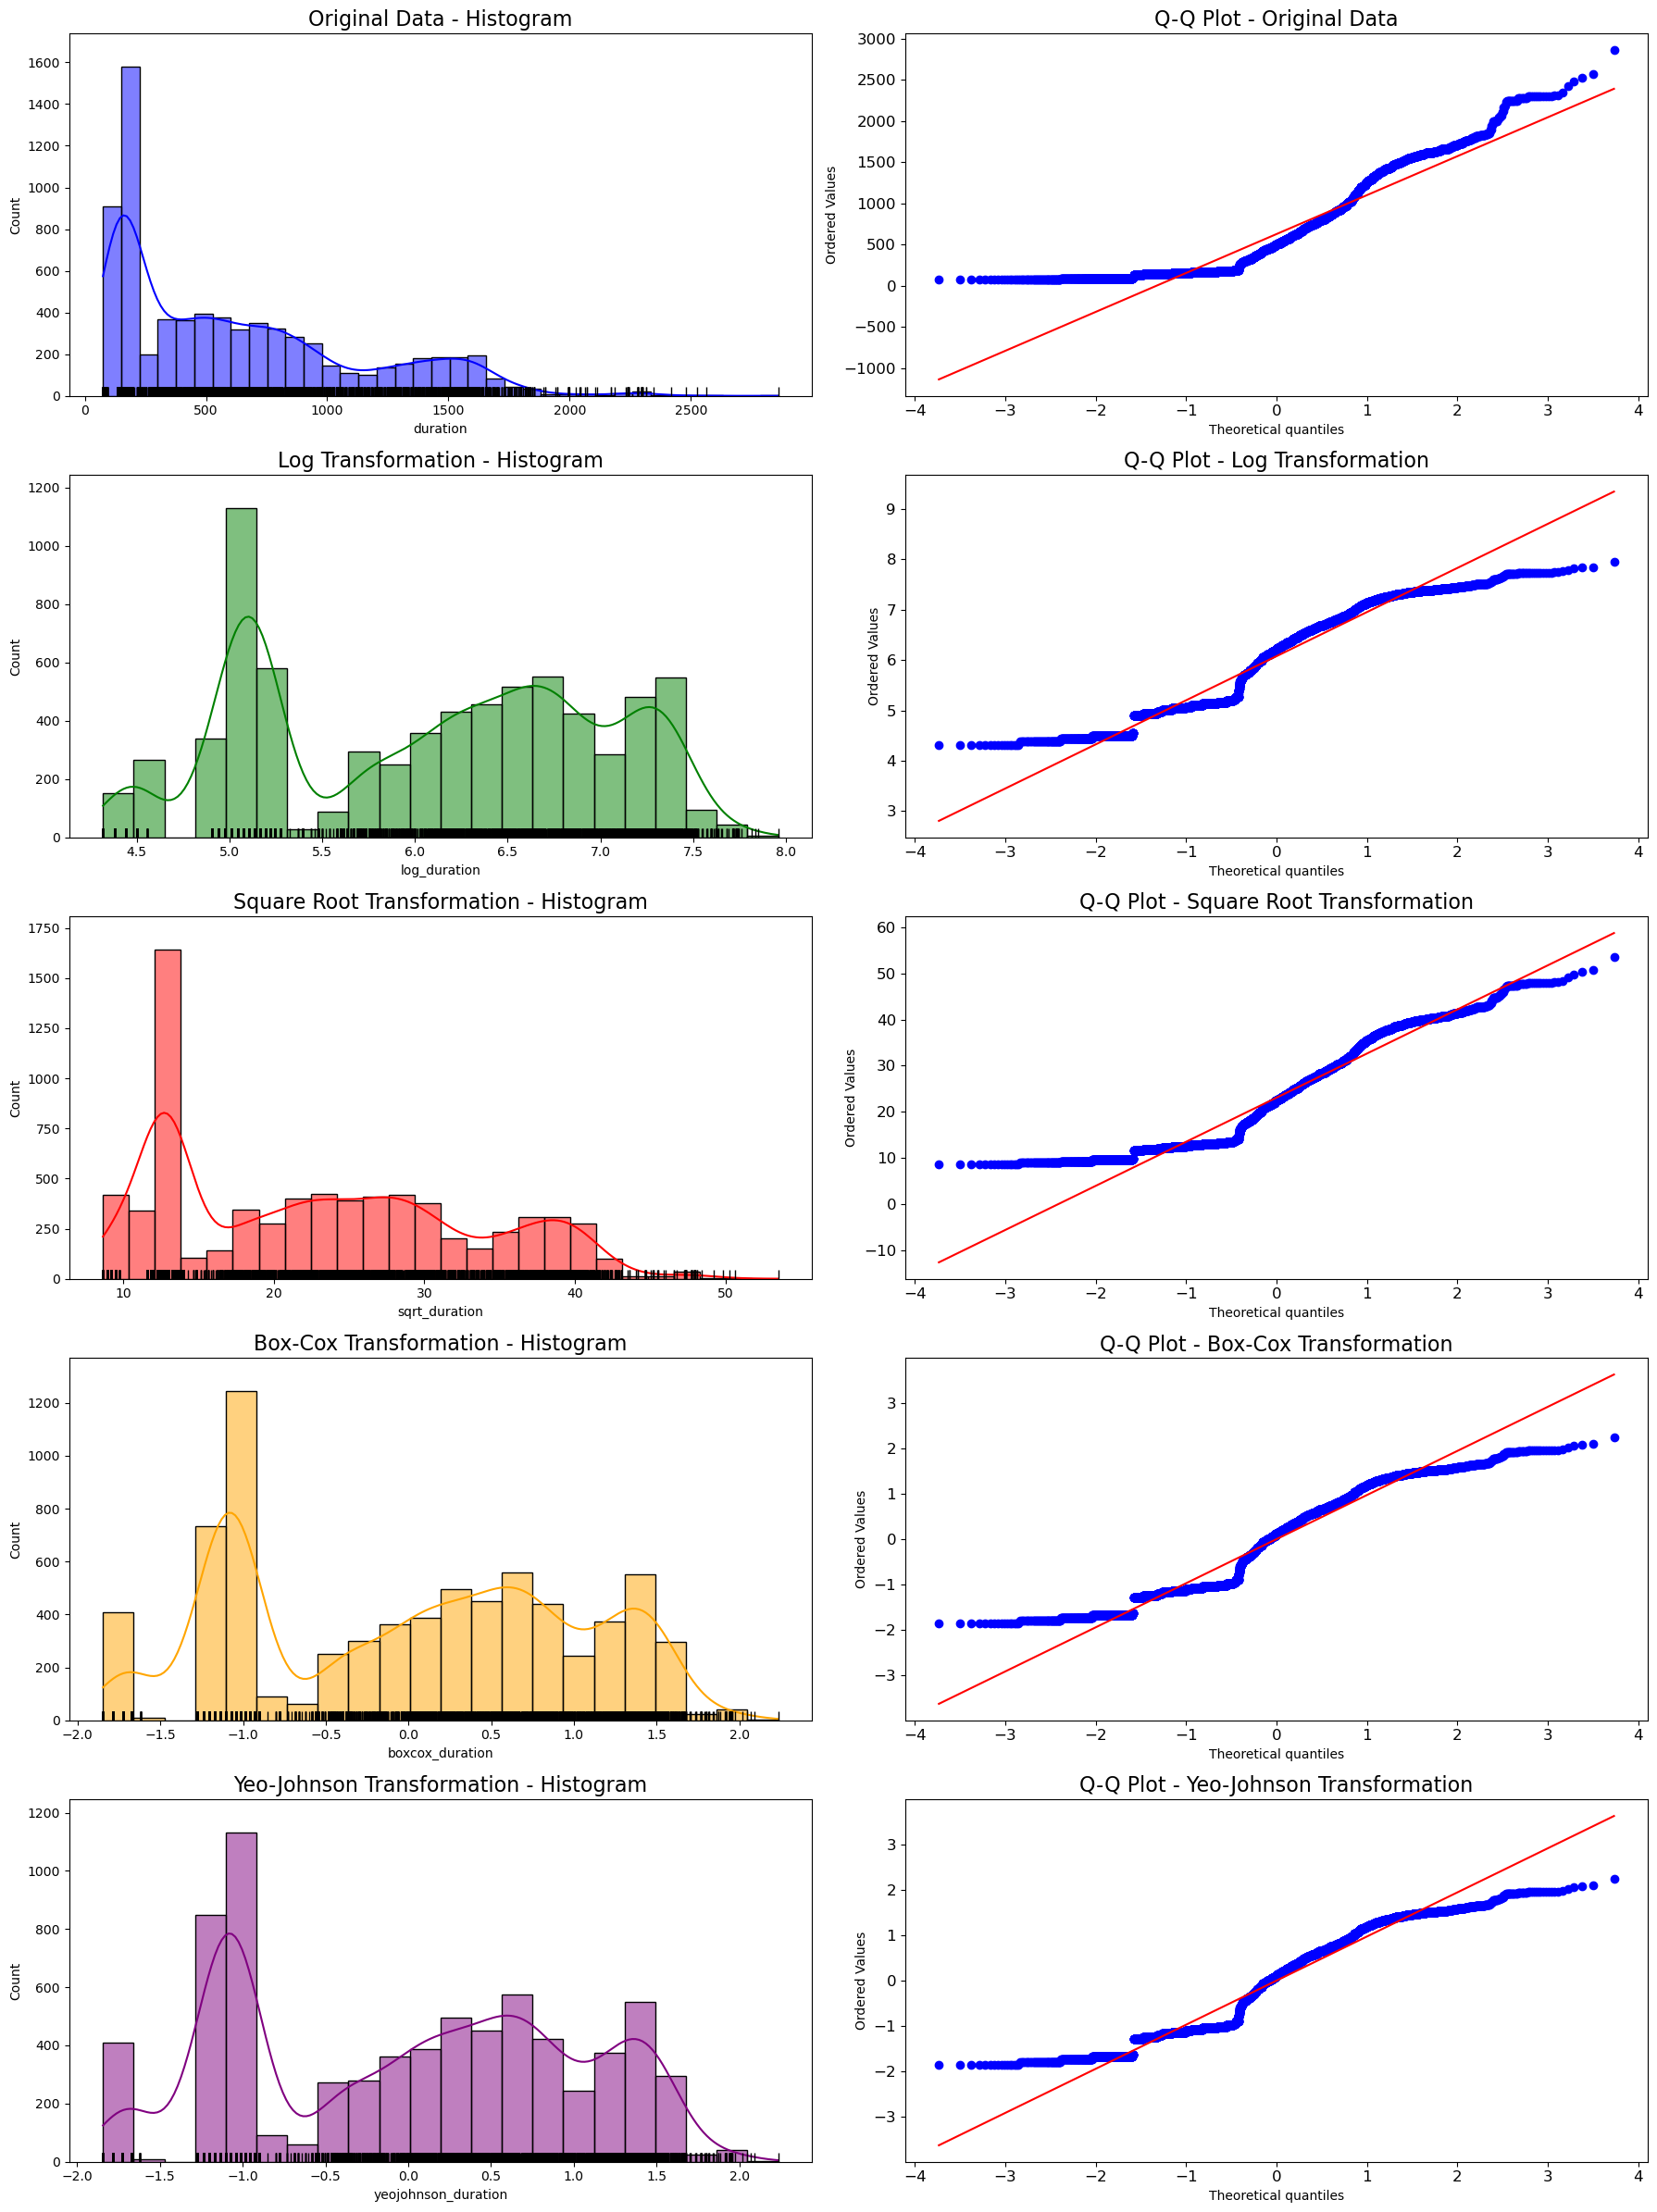

In [52]:
vizpro.transformation_plot(df, 'duration')

### **bivariate plots between 2 numeric variables**


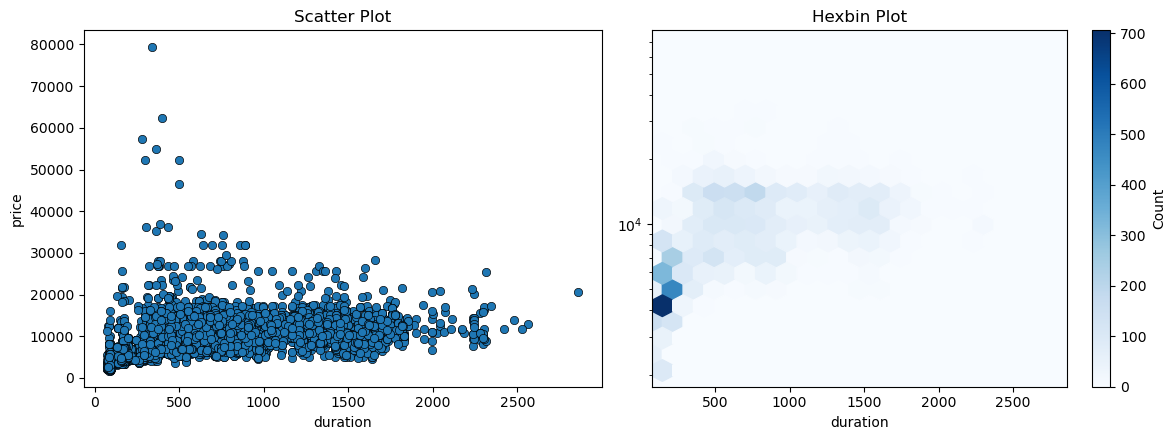

In [54]:
vizpro.num_bivar_plots(
	df,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

### **multivariate plots between 2 numeric and 2 categorical variables**


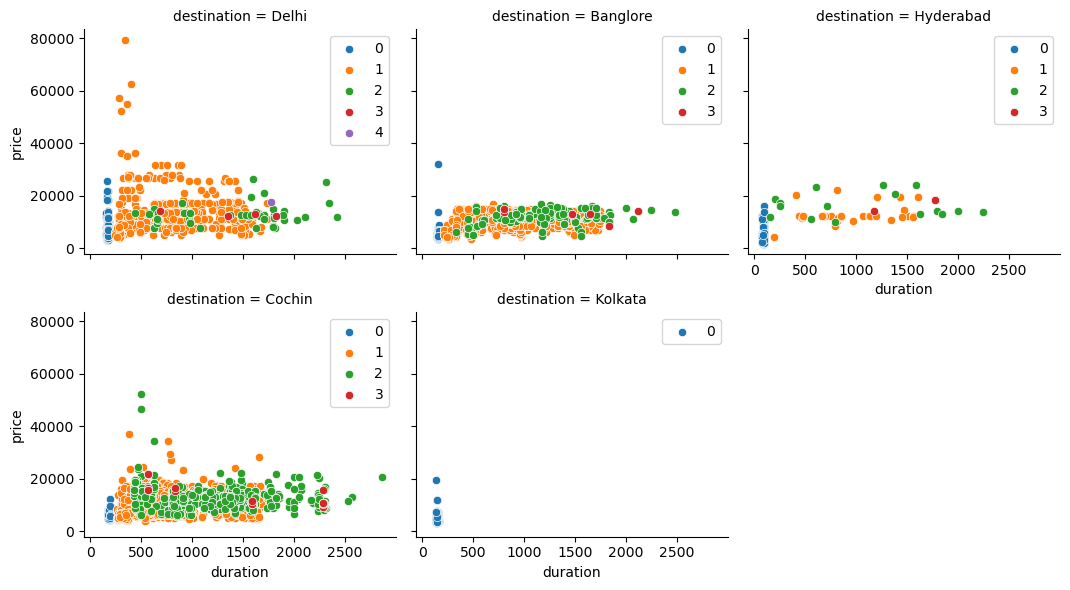

In [57]:
vizpro.num_cat_facetgrid(df,"destination", "total_stops", "duration", "price")


In [59]:
vizpro.get_iqr_outliers(df, "duration")

Lower Limit : -940.0
Upper Limit : 2020.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
105,Air India,2019-03-18,Banglore,Delhi,2024-09-04 06:45:00,2024-09-04 16:30:00,2025,2,no info,10835
2112,Jet Airways,2019-03-21,Delhi,Cochin,2024-09-04 18:25:00,2024-09-04 04:25:00,2040,2,no info,12347
7079,Jet Airways,2019-03-21,Delhi,Cochin,2024-09-04 18:20:00,2024-09-04 04:25:00,2045,2,no info,13082
7267,Jet Airways,2019-03-03,Delhi,Cochin,2024-09-04 18:20:00,2024-09-04 04:25:00,2045,2,no info,20747
5582,Air India,2019-05-01,Kolkata,Banglore,2024-09-04 05:50:00,2024-09-04 16:15:00,2065,2,no info,10991
4236,Jet Airways,2019-03-06,Delhi,Cochin,2024-09-04 17:55:00,2024-09-04 04:25:00,2070,2,no info,17072
2822,Jet Airways,2019-03-06,Delhi,Cochin,2024-09-04 17:55:00,2024-09-04 04:25:00,2070,2,in-flight meal not included,15812
5922,Air India,2019-03-03,Banglore,Delhi,2024-09-04 11:05:00,2024-09-04 22:10:00,2105,2,no info,11791
2887,Air India,2019-03-24,Kolkata,Banglore,2024-09-04 12:00:00,2024-09-04 23:15:00,2115,3,no info,14221
6793,Air India,2019-03-09,Delhi,Cochin,2024-09-04 07:05:00,2024-09-04 19:15:00,2170,2,no info,11762


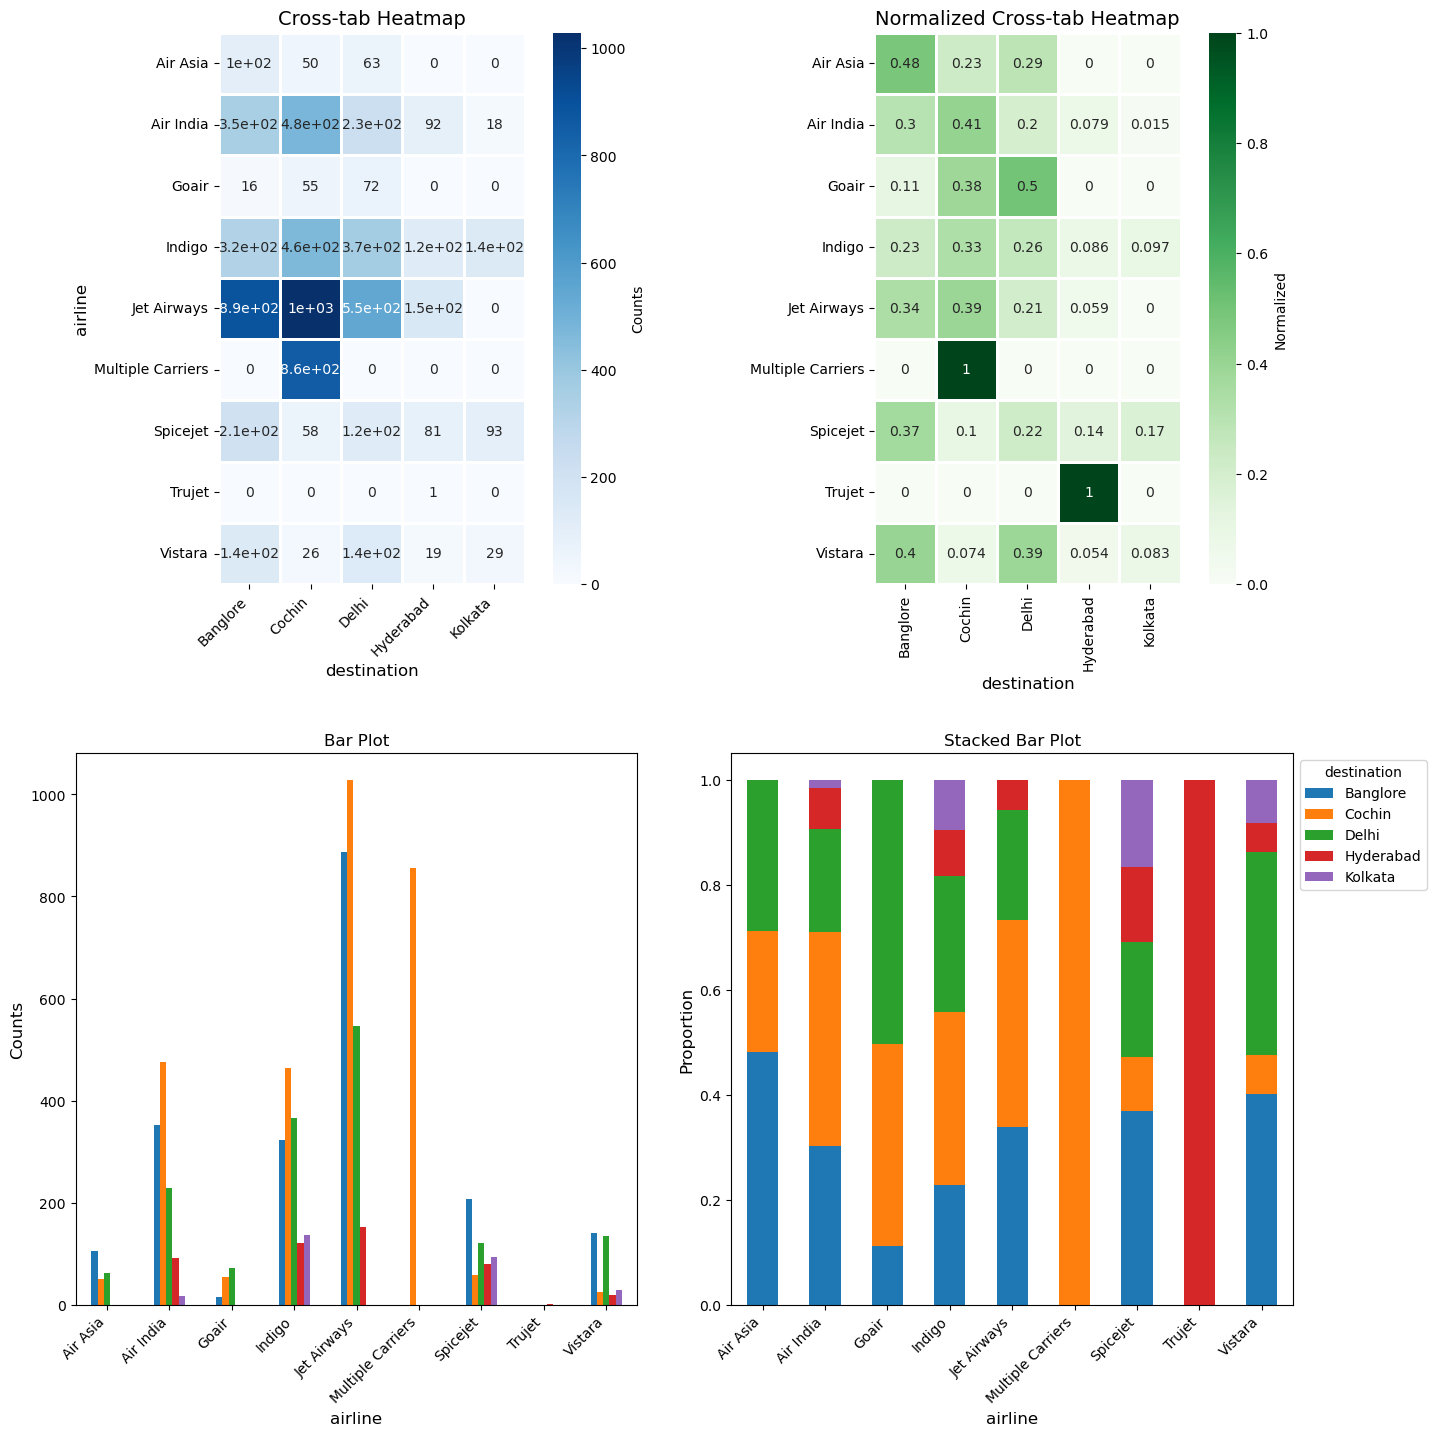

In [61]:
vizpro.plot_cat_bivariate(df, "airline", "destination", xlabel_rotation=45)


In [63]:
vizpro.hyp_cat_cat(df, "airline", "destination")

- Cramérs V            : 0.2860
- Significance Level   : 5.00%
- Null Hypothesis      : The variables are independent
- Alternate Hypothesis : The variables are dependent
- Chi-square Statistic : 2395.5229
- p-value              : 0.0000

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
The variables airline and destination are likely associated.


In [65]:
!pip install ydata-profiling
# install the missing module using pip
from ydata_profiling import ProfileReport
# import the module after installation

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   ------------ --------------------------- 112.6/356.2 kB 6.4 MB/s eta 0:00:01
   ----------------- ---------------------- 153.6/356.2 kB 3.1 MB/s eta 0:00:01
   ------------------- -------------------- 174.1/356.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 307.2/356.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  348.2/356.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 356.2/356.2 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ----------------------------- ---------- 215.0/296.5 kB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 286.7/296.5 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 296.5/296.5 kB 2.3 MB/s eta 0:00:00
   ---------------------------------

In [72]:
report = ProfileReport(df)
report.to_file(output_file="output.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]